In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [ ]:
# 4-2, 4-3
# cross and dot
plt.clf()
ax = plt.axes(projection="3d")
ax.set_box_aspect(aspect=(1, 1, 1))
a = np.array([3, -5, 1])
b = np.array([1, 4, 0])
crossed = np.cross(a, b)

print("a dot   b is", np.dot(a, b))
print("a cross b is", crossed)

size = 10
ax.set_xlim3d(-size, size)
ax.set_ylim3d(-size, size)
ax.set_zlim3d(-size, size)

ax.quiver(0, 0, 0, *a, color="r")
ax.quiver(0, 0, 0, *b, color="b")
ax.quiver(0, 0, 0, *crossed, color="black")

plt.show()

In [ ]:
# 5-1
# summation of 2 2-dimension arrays
plt.clf()
a = np.array([1, 2])
b = np.array([-2, 3])
summ = a + b
sub = a - b
mul = np.array(np.matmul(a, b))

print(f"a + b = {summ}")
print(f"a - b = {sub}")
print(f"a * b = {mul}")

plt.xlim(-6, 6)
plt.ylim(-6, 6)

plt.quiver(0, 0, *a, color="black", angles="xy", scale_units="xy", scale=1)
plt.quiver(0, 0, *b, color="black", angles="xy", scale_units="xy", scale=1)

plt.quiver(0, 0, *summ, color="blue", angles="xy", scale_units="xy", scale=1)
plt.quiver(0, 0, *sub, color="red", angles="xy", scale_units="xy", scale=1)
plt.show()

In [ ]:
# 5-1
# summation of many n-dimension arrays
vectors = np.array([[[1, 2, 3], [2, 4, 6]],
                    [[-2, 5, -3], [2, 7, 4]],
                    [[-1, -7, 4], [4, 5, 8]]])
summ = vectors[0]
for v in vectors[1:]:
    summ += v
print(f"sum = \n{summ}")

In [ ]:
# 5-1
# summation of 2-dimension arrays, then plot it out
plt.clf()
vectors = np.array([[1, 2],
                    [-2, 5],
                    [-1, -7]])

limit_x = np.max(np.abs(vectors), axis=0)[0] * 1.7
limit_y = np.max(np.abs(vectors), axis=0)[1] * 1.7
plt.xlim(-limit_x, limit_x)
plt.ylim(-limit_y, limit_y)

for v in vectors:
    plt.quiver(0, 0, v[0], v[1], color="black", angles="xy", scale_units="xy", scale=1)

summation = vectors[0]
for i in vectors[1:]: summation += i
plt.quiver(0, 0, summation[0], summation[1], color="blue",
           angles="xy", scale_units="xy", scale=1)

plt.show()

In [ ]:
from sympy import Matrix, symbols, diff, sin, cos, pprint, init_printing, exp
from sympy.solvers.solveset import linsolve
from sympy.plotting import plot3d_parametric_line
from sympy.vector import CoordSys3D, gradient, divergence, Del, curl
from mpl_toolkits.mplot3d import axes3d

In [ ]:
# 5-3, 5-5
# solve linear algebra, includes inhomogeneous(非齊次) solve
# AX = B, X = (x1, x2, ..., xn)^t, B = (b1, b2, ..., bm)^t
x1, x2, x3, x4 = symbols("x1, x2, x3, x4")
AnB = Matrix([[1, -2, 3, -4, -8],
              [2, 1, 0, 2, 11],
              [1, 1, -1, 2, 7],
              [2, 1, -3, 1, 0]])  # [A|B]
linsolve(AnB, (x1, x2, x3, x4))

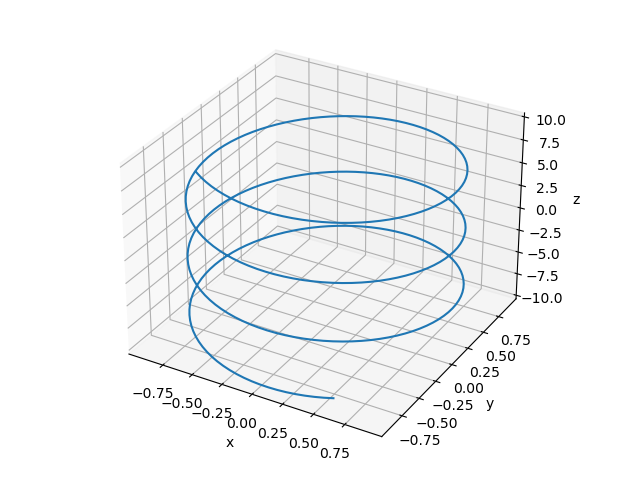

C:\Users\Tom\anaconda3\envs\workspace\lib\site-packages\sympy\plotting\plot.py:1445: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_zlim(zlim)


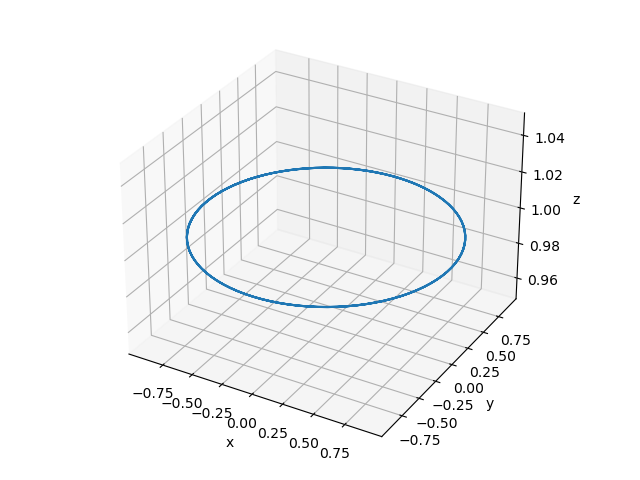

In [32]:
# 6-1
# v(t) = v1(t)i + v2(t)j + v3(t)k
# i, j, k are vectors, (1, 0, 0), (0, 1, 0), (0, 0, 1)
t = symbols("t")
v1_t = sin(t)
v2_t = cos(t)
v3_t = t
v_t = 0
alpha = [v1_t, v2_t, v3_t]
plot3d_parametric_line(*alpha)
diffed = [diff(v1_t, t), diff(v2_t, t), diff(v3_t, t)]
plot3d_parametric_line(*diffed)

          2      2
     - x_R  - y_R 
x_R⋅ℯ             
⎛               2      2         2      2⎞       ⎛                 2      2⎞  
⎜       2  - x_R  - y_R     - x_R  - y_R ⎟ i_R + ⎜            - x_R  - y_R ⎟ j
⎝- 2⋅x_R ⋅ℯ              + ℯ             ⎠       ⎝-2⋅x_R⋅y_R⋅ℯ             ⎠  

  
_R
  


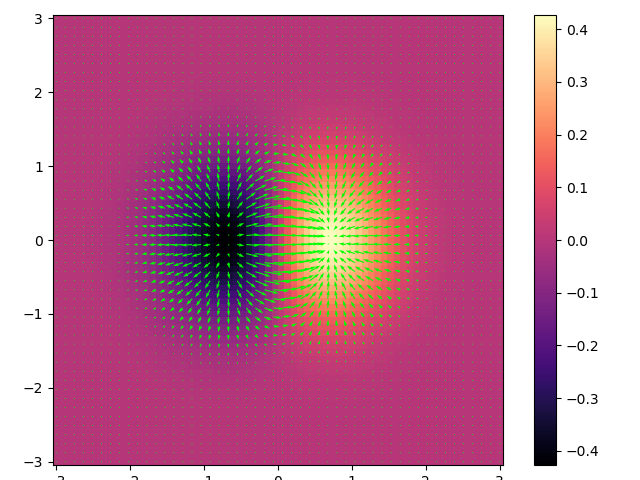

In [39]:
# 什麼是梯度, Del() 的使用
plt.clf()
R = CoordSys3D("R")
delop = Del()  # del operator, 相當於∇

coeff_xyz = [2, 3, 4]  # x, y, z
R.z = R.x*exp(-(R.x**2 + R.y**2))
g = delop.gradient(R.z, doit=True)

pprint(R.z)
pprint(g)

X4Q, Y4Q = np.mgrid[-3:3:50j, -3:3:50j]
X4QV, Y4QV = np.copy(X4Q), np.copy(Y4Q)
X4B = np.linspace(-3, 3, 70)
Y4B = np.linspace(-3, 3, 70)

dx = (X4B[1] - X4B[0]) / 2.
dy = (Y4B[1] - Y4B[0]) / 2.
extent = [X4B[0] - dx, X4B[-1] + dx, Y4B[0] - dy, Y4B[-1] + dy]
P = np.zeros((70, 70))

for i in range(X4QV.shape[1]):
    for j in range(Y4QV.shape[0]):
        tmp = g.subs({R.x: X4Q[j, i], R.y: Y4Q[j, i]})
        tmp = tmp.to_matrix(R)[:2]
        X4QV[j, i], Y4QV[j, i] = tmp

for i in range(len(X4B)):
    for j in range(len(Y4B)):
        P[j, i] = R.z.subs({R.x: X4B[i], R.y: Y4B[j]})

plt.quiver(X4Q, Y4Q, X4QV, Y4QV, color="lime",
           angles="xy", scale_units="xy", scale=3)
plt.imshow(P, extent=extent, cmap="magma")
plt.colorbar()

plt.show()


In [ ]:
# 梯度, 直接用gradient()
R = CoordSys3D("R")
coeff_xyz = [2, 3, 4]  # x, y, z
f = coeff_xyz[0] * R.x ** 2 + coeff_xyz[1] * R.y ** 2
g = gradient(f)
pprint(g)

In [ ]:
# 方向導數
R = CoordSys3D("R")
coeff_xyz = [2, 3, 4]  # x, y, z
coeff_ijk = [1, 2, -1]  # i, j, k
f = coeff_xyz[0] * R.x ** 2 + coeff_xyz[1] * R.y ** 2 + coeff_xyz[2] * R.z ** 2
g = gradient(f)
del_f = g.subs([(R.x, 1), (R.y, 2), (R.z, 3)])
a = coeff_ijk[0] * R.i + coeff_ijk[1] * R.j + coeff_ijk[2] * R.k
init_printing()

print("f(x, y, z) = ")
pprint(f)
print("\na = ")
pprint(a)
print("\n∇f = ")
pprint(g)
pprint(del_f)
print()

result = (del_f.dot(a)) / (sum([f ** 2 for f in coeff_ijk])) ** 0.5

print("answer is (1 / ||a||) ∇f ⋅ a")
print("result is: ", end="")
pprint(result)

[[-0.90929743 -0.90929743 -0.90929743 -0.90929743 -0.90929743 -0.90929743
  -0.90929743 -0.90929743 -0.90929743 -0.90929743 -0.90929743 -0.90929743
  -0.90929743 -0.90929743 -0.90929743 -0.90929743 -0.90929743 -0.90929743
  -0.90929743 -0.90929743 -0.90929743 -0.90929743 -0.90929743 -0.90929743
  -0.90929743 -0.90929743 -0.90929743 -0.90929743 -0.90929743 -0.90929743]
 [-0.95787919 -0.95787919 -0.95787919 -0.95787919 -0.95787919 -0.95787919
  -0.95787919 -0.95787919 -0.95787919 -0.95787919 -0.95787919 -0.95787919
  -0.95787919 -0.95787919 -0.95787919 -0.95787919 -0.95787919 -0.95787919
  -0.95787919 -0.95787919 -0.95787919 -0.95787919 -0.95787919 -0.95787919
  -0.95787919 -0.95787919 -0.95787919 -0.95787919 -0.95787919 -0.95787919]
 [-0.9882662  -0.9882662  -0.9882662  -0.9882662  -0.9882662  -0.9882662
  -0.9882662  -0.9882662  -0.9882662  -0.9882662  -0.9882662  -0.9882662
  -0.9882662  -0.9882662  -0.9882662  -0.9882662  -0.9882662  -0.9882662
  -0.9882662  -0.9882662  -0.9882662  -

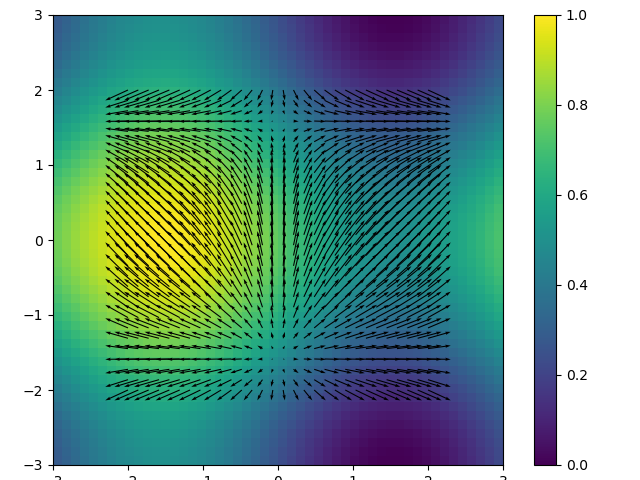

(sin(x_R)) i_R + (cos(y_R)) j_R
-sin(y_R) + cos(x_R)


In [42]:
# 什麼是散度
# 散度是∇ ⋅ f
plt.clf()

R = CoordSys3D("R")
f = 1 * sin(R.x) * R.i + \
    1 * cos(R.y) * R.j
d = delop.dot(f, doit=True)

resolution = 50

X4B, Y4B = np.mgrid[-3:3:resolution * 1j, -3:3:resolution * 1j]
img = np.zeros((resolution, resolution))
extent = [-3, 3, -3, 3]

for i, v in np.ndenumerate(X4B):
    now = d.subs({R.x: v, R.y: Y4B[i]})
    img[i] = now
plt.imshow(img, extent=extent)

resolution = 30
X4Q, Y4Q = np.mgrid[-2:2:resolution * 1j, -2:2:resolution * 1j]
X4QV, Y4QV = np.mgrid[-2:2:resolution * 1j, -2:2:resolution * 1j]
for i, v in np.ndenumerate(X4Q):
    now = f.subs({R.x: v, R.y: Y4Q[i]}).to_matrix(R)
    X4QV[i] = now[0]
    Y4QV[i] = now[1]
print(X4QV)
plt.quiver(X4Q, Y4Q, X4QV, Y4QV, angles="xy", scale_units="xy", scale=3)

plt.colorbar()
plt.show()

pprint(f)
pprint(d)

In [ ]:
# 散度, 直接用divergence()
d = divergence(f)
pprint(d)

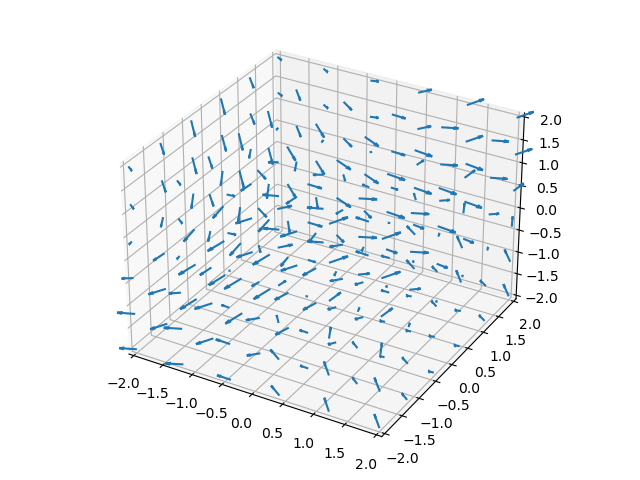

(sin(z_R)) i_R + (sin(x_R)) j_R + (-cos(y_R)) k_R


In [44]:
# 什麼是旋度
# 旋度是∇ × f
plt.clf()
ax = plt.axes(projection="3d")
R = CoordSys3D("R")
f = sin(R.y) * R.i + \
    cos(R.z) * R.j + \
    cos(R.x) * R.k
c = delop.cross(f, doit=True)
X4Q, Y4Q, Z4Q = np.mgrid[-2:2:6j, -2:2:6j, -2:2:6j]
X4QV, Y4QV, Z4QV = np.copy(X4Q), np.copy(Y4Q), np.copy(Z4Q)

for i, v in np.ndenumerate(X4Q):
    now = c.subs({R.z: Z4Q[i], R.x: v, R.y: Y4Q[i]}).to_matrix(R)[:3]
    X4QV[i] = now[0]
    Y4QV[i] = now[1]
    Z4QV[i] = now[2]
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))
ax.set_zlim((-2, 2))
plt.quiver(X4Q, Y4Q, Z4Q, X4QV, Y4QV, Z4QV, length=0.2)
plt.show()
pprint(c)

In [44]:
# 散度, 直接用curl()
c = curl(f)
pprint(c)

⎛     2    2            2⎞        ⎛       2        2        2    ⎞     
⎝4⋅x_R ⋅y_R ⋅z_R - 4⋅z_R ⎠ j_R  + ⎝- 4⋅x_R ⋅y_R⋅z_R  + 9⋅x_R ⋅y_R⎠ k_R 
